You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

   After removing outliers in step 1, you get a new dataframe.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.shape

(13200, 7)

(array([1.3198e+04, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.67000000e+02, 1.20024030e+06, 2.40021360e+06, 3.60018690e+06,
        4.80016020e+06, 6.00013350e+06, 7.20010680e+06, 8.40008010e+06,
        9.60005340e+06, 1.08000267e+07, 1.20000000e+07]),
 <a list of 10 Patch objects>)

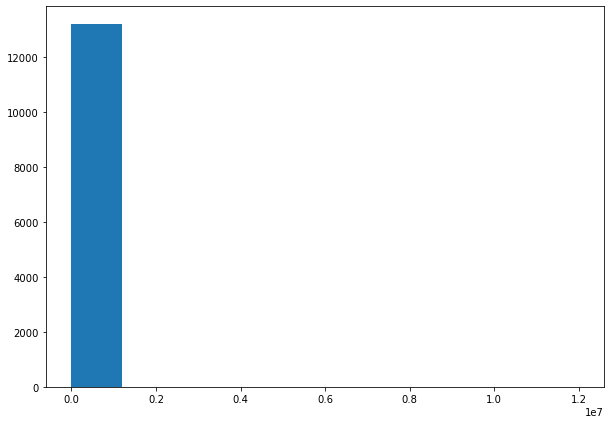

In [4]:
plt.figure(figsize=(10,7))
plt.hist(df.price_per_sqft)

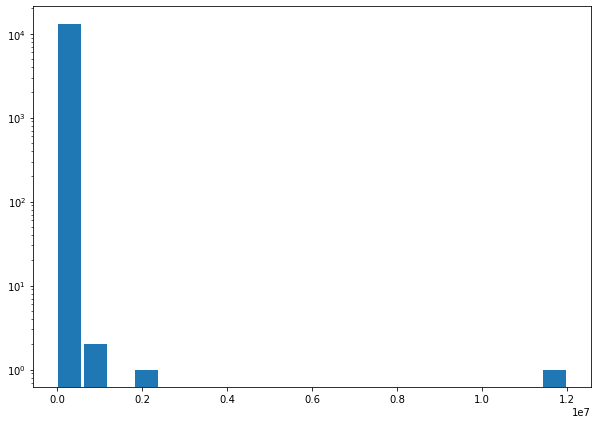

In [5]:
plt.figure(figsize=(10,7))
plt.hist(df.price_per_sqft, bins=20,rwidth=0.9)
plt.yscale("log")

In [6]:
df.price_per_sqft.isnull().any()

False

In [7]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [8]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [9]:
df1 = df[(df.price_per_sqft<upper_limit)&(df.price_per_sqft>lower_limit)]
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [10]:
df1.shape

(13172, 7)

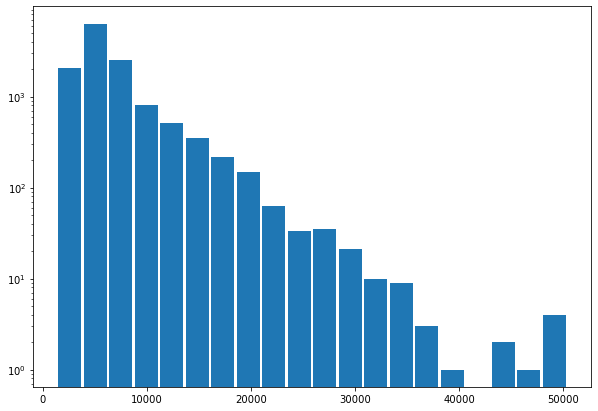

In [11]:
plt.figure(figsize=(10,7))
plt.hist(df1.price_per_sqft, bins=20,rwidth=0.9)
plt.yscale("log")

(2) On new dataframe, use 4 standard deviation to remove outliers

(3) Plot histogram for new dataframe that is generated after step (2). Also plot bell curve on same histogram

In [12]:
df1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
df1.shape

(13172, 7)

In [14]:
df1.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [15]:
upper_lim = df1.price_per_sqft.mean() + 4*df1.price_per_sqft.std()
lower_lim = df1.price_per_sqft.mean() - 4*df1.price_per_sqft.std()
upper_lim, lower_lim

(23227.73653589429, -9900.429065502549)

In [16]:
df2 = df1[(df1.price_per_sqft<upper_lim)&(df1.price_per_sqft>lower_lim)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [17]:
df1.shape, df2.shape

((13172, 7), (13047, 7))

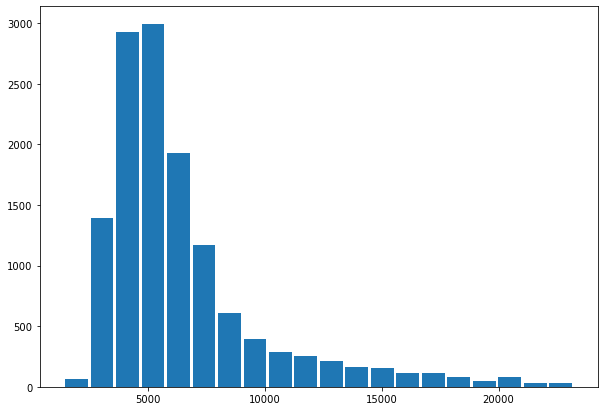

In [18]:
plt.figure(figsize=(10,7))
plt.hist(df2.price_per_sqft, bins=20,rwidth=0.9)
plt.show()

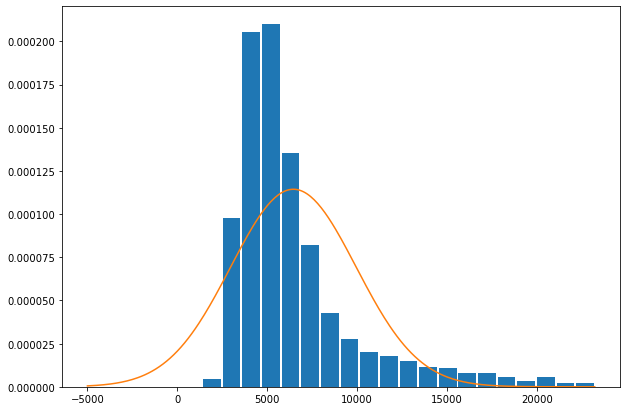

In [19]:
plt.figure(figsize=(10,7))
plt.hist(df2.price_per_sqft, bins=20,rwidth=0.9, density=True)

rng = np.arange(-5000, df2.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std()))

(4) On step(1) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (2) and you will get exact same result

In [20]:
df1['z_score'] = (df1.price_per_sqft - df1.price_per_sqft.mean()) / df1.price_per_sqft.std()
df1.head()

<ipython-input-20-9ae5090378b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['z_score'] = (df1.price_per_sqft - df1.price_per_sqft.mean()) / df1.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [21]:
df3 = df1[(df1.z_score<4)&(df1.z_score>-4)]
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [22]:
df1.shape, df3.shape

((13172, 8), (13047, 8))